In [25]:
# Importing needed libaries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from 'c:\\Users\\marwi\\OneDrive - Universität Potsdam\\Intro_to_ML\\temp\\uib-machine-learning\\assignment-2\\src\\util.py'>

In [2]:
# Loading the given data files
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [3]:
# Preprocessing step: Calling downsampling method from utils file in order to create a dataset with a equal amout of classes
downsampled_X, downsampled_y, unique_classes_downsampled, class_counts_downsampled = utils.downsampling(X, y)

In [4]:
# Splitting of Dataset
X_sampled, _, y_sampled, _ = train_test_split(downsampled_X, downsampled_y, stratify=downsampled_y, random_state=42)

# Preprocessing step: Flattening of images to a 1D Array
X_flattened = X_sampled.reshape(X_sampled.shape[0], -1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_flattened, y_sampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
# Finding the best hyperparameter variants for the Support Vector machine

# Define parameter grids for the different variants
param_grid_linear = {
    'kernel': ['linear']
}

param_grid_poly = {
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'gamma': ['auto', 'scale'],
    'coef0': [0.0, 1.0]
}

param_grid_rbf = {
    'kernel': ['rbf'],
    'gamma': [0.1, 0.01, 1.0, 0.001, 0.0001, 0.25, 0.5, 0.75]
}

param_grid_sigmoid = {
    'kernel': ['sigmoid'],
    'degree': [2],
    'gamma': [0.01, 0.1, 0.3, 1.0],
    'coef0': [0.0, 0.5, 1.0]
}

# List of parameter grids
param_grids = [param_grid_linear, param_grid_poly, param_grid_rbf, param_grid_sigmoid]

# Lists to store the best parameters and scores for each variant
best_parameters = {}
best_scores = {}

# Iterating through the parameter grids and perform GridSearch for each variant
for i, param_grid in enumerate(param_grids):
    # Performing GridSearch
    model_SVM = SVC()
    grid_search = GridSearchCV(model_SVM, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Getting the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Storing the best parameters and score for the current variant
    variant_name = f"Variant {i+1}"
    best_parameters[variant_name] = best_params
    best_scores[variant_name] = best_score

# Print the best parameters and scores for each variant
for variant, params in best_parameters.items():
    print(f"{variant} - Best Parameters:", params)
    print(f"{variant} - Best Score:", best_scores[variant])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Variant 1 - Best Parameters: {'kernel': 'linear'}
Variant 1 - Best Score: 0.8587114845938375
Variant 2 - Best Parameters: {'coef0': 1.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Variant 2 - Best Score: 0.9102521008403363
Variant 3 - Best Parameters: {'gamma': 0.001, 'kernel': 'rbf'}
Variant 3 - Best Score: 0.0880672268907563
Variant 4 - Best Parameters: {'coef0': 0.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
Variant 4 - Best Score: 0.06084033613445378


In [6]:
# Model training and Cross Validation

# Training SVM model using training and validation data
model_SVM = SVC(kernel='poly', degree=4, gamma='scale', coef0=1.0)
model_SVM.fit(X_train, y_train)

# Defining the number of folds for cross-validation
num_folds = 5 

# Creating a cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Performing cross-validation and calculate accuracy for each fold
cross_val_scores = cross_val_score(model_SVM, X_train, y_train, cv=kf, scoring='accuracy')

# Printing the accuracy scores for each fold
for fold, score in enumerate(cross_val_scores, start=1):
    print(f'Cross-Validation Fold {fold}: Accuracy = {score:.4f}')

# Calculating the mean and standard deviation of the accuracy scores
mean_accuracy = cross_val_scores.mean()
std_deviation = cross_val_scores.std()

# Print the mean and standard deviation of accuracy
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation: {std_deviation:.4f}')

# Predictions on validation data
svm_prediction = model_SVM.predict(X_val)

# Evaluation on validation data
val_accuracy = accuracy_score(y_val, svm_prediction)

# Print validation evaluation results
print("Validation Accuracy: ", val_accuracy)

Cross-Validation Fold 1: Accuracy = 0.9210
Cross-Validation Fold 2: Accuracy = 0.9104
Cross-Validation Fold 3: Accuracy = 0.9182
Cross-Validation Fold 4: Accuracy = 0.9137
Cross-Validation Fold 5: Accuracy = 0.9154
Mean Accuracy: 0.9157
Standard Deviation: 0.0037
Validation Accuracy:  0.9100418410041841


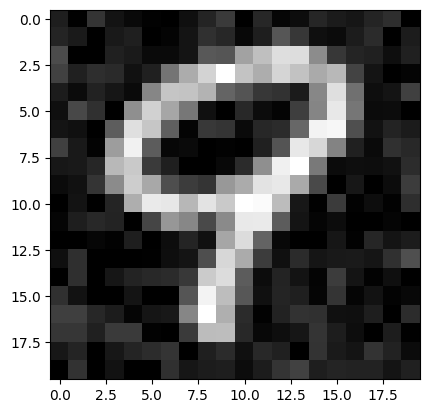

Predicted Class: 9


In [26]:
# Testing functionality with manual testing

# Choose a random index from the validation set
random_index = np.random.randint(0, len(X_val))

# Display the image
plt.imshow(X_val[random_index].reshape(20, 20), vmin=0, vmax=255, cmap="gray")
plt.show()

# Predict the class using the trained model
predicted_class = model_SVM.predict(X_val[random_index].reshape(1, -1))

# Print the predicted class
print("Predicted Class:", predicted_class[0])

# Predictions on validation data
svm_prediction = model_SVM.predict(X_val)

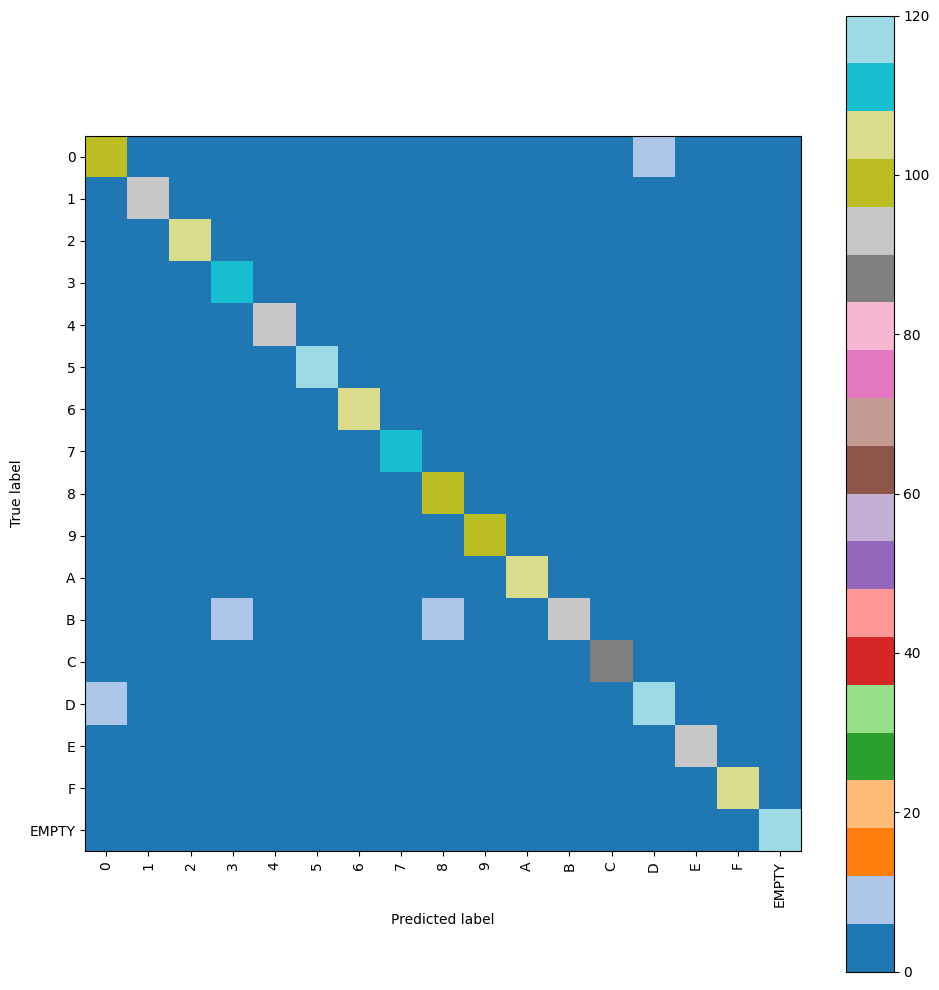

In [27]:
# Creation of a confusion matrix

svm_cm = metrics.confusion_matrix(y_val, svm_prediction)
utils.generate_confusion_matrix(svm_cm, "confusion_matrix_SVM", y_val)